In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [2]:

data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,data_folder,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [4]:
# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [5]:
data

array([[[[0.29411765, 0.30588235, 0.31372549],
         [0.29019608, 0.29803922, 0.30588235],
         [0.33333333, 0.3372549 , 0.32941176],
         ...,
         [0.26666667, 0.29411765, 0.29019608],
         [0.25490196, 0.27058824, 0.26666667],
         [0.25882353, 0.2627451 , 0.25882353]],

        [[0.3254902 , 0.32941176, 0.3372549 ],
         [0.31372549, 0.31372549, 0.32156863],
         [0.34509804, 0.34509804, 0.3254902 ],
         ...,
         [0.28627451, 0.30196078, 0.30588235],
         [0.29803922, 0.30588235, 0.29411765],
         [0.31372549, 0.31372549, 0.30588235]],

        [[0.30588235, 0.30588235, 0.31372549],
         [0.3372549 , 0.33333333, 0.3372549 ],
         [0.35294118, 0.34901961, 0.35294118],
         ...,
         [0.27843137, 0.29019608, 0.27843137],
         [0.28627451, 0.29019608, 0.27058824],
         [0.30588235, 0.30588235, 0.29019608]],

        ...,

        [[0.52156863, 0.5254902 , 0.54509804],
         [0.48235294, 0.49803922, 0.51764706]

In [6]:
# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


In [8]:
y_train.shape

(31367, 43)

In [9]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


C:\Users\prvij\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441,835 (1.69 MB)

 Trainable params: 441,835 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4089 - loss: 2.1983 - val_accuracy: 0.9388 - val_loss: 0.2645
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8632 - loss: 0.4342 - val_accuracy: 0.9732 - val_loss: 0.1114
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9246 - loss: 0.2471 - val_accuracy: 0.9846 - val_loss: 0.0675
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9433 - loss: 0.1851 - val_accuracy: 0.9894 - val_loss: 0.0527
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9552 - loss: 0.1452 - val_accuracy: 0.9909 - val_loss: 0.0374
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9607 - loss: 0.1235 - val_accuracy: 0.9932 - val_loss: 0.0342
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9680 - loss: 0.1027 - val_accuracy: 0.9929 - val_loss: 0.0322
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9664 - loss: 0.1058 - val_accuracy: 0.

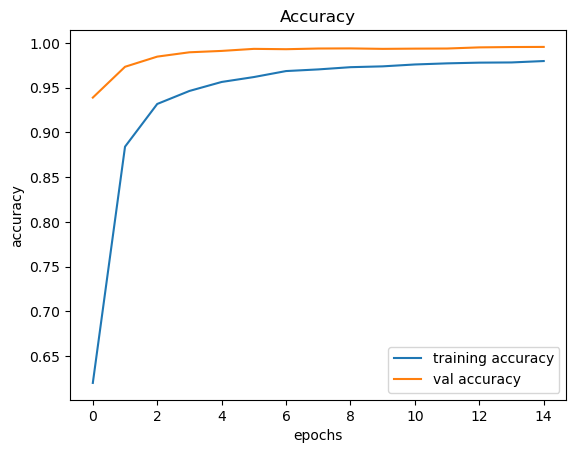

In [11]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


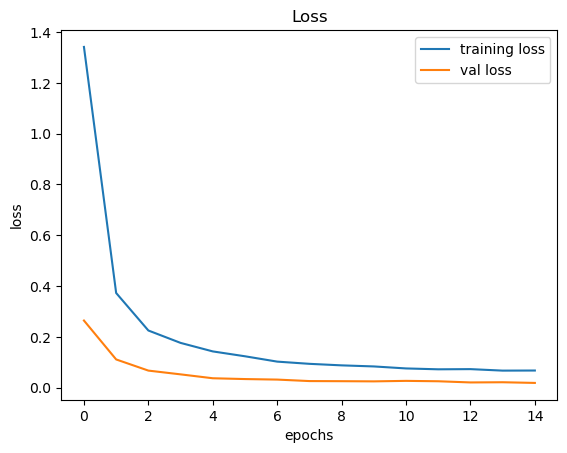

In [12]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv(data_folder+'/'+'Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(path + '\\' + img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

In [14]:
# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)


In [15]:
# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)


Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 715   1 ...   0   0   0]
 [  0   6 743 ...   0   0   0]
 ...
 [  0   0   0 ...  83   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   0  90]]
Accuracy: 0.964846
Precision: 0.948312
Recall: 0.945908
F1 score: 0.944637


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


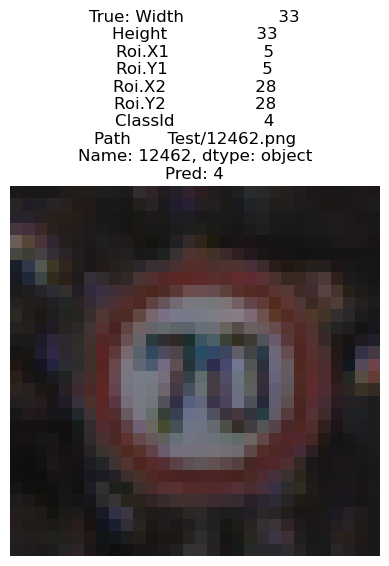

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random sample from the test set
index = np.random.choice(len(X_test), 1)[0]
sample_image = X_test[index]

# If y_test is a DataFrame, use iloc to get the label at the same index
sample_label = y_test.iloc[index] if isinstance(y_test, pd.DataFrame) else y_test[index]

# Predict the label
predicted_label = np.argmax(model.predict(np.array([sample_image])))

# Plot the image with the true and predicted labels
plt.imshow(sample_image.reshape(30, 30, 3))  # Adjust reshape if your images are a different size
plt.axis('off')
plt.title(f"True: {sample_label}\nPred: {predicted_label}")
plt.show()
